In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import pandas as pd
import imageio
from IPython.display import Image

In [11]:
#reading files
val = {}
for i in range(1,15):
    name = "Trajectories/tr" + str(i) + ".csv"
    df = pd.read_csv(name)
    arr = np.array(df)
    val[i] = arr.astype(int)

In [12]:
#time dictionary
t_val = {}
for i in range(59):
    t_val[i] = np.empty((0,3))
    for j in range(1,15):
        temp = t_val[i].copy()
        t_val[i] = np.vstack((temp, val[j][i]))
        
        

## Interactive plot

In [13]:
class grain_img():
    def __init__(self, tp, adj):
        self.tp = tp
        self.adj = adj
        
    def grain_plot(self, ind):
        edge = np.array(np.where(self.adj[ind] == 1))
        _, l = len(edge), len(np.transpose(edge))
        new = np.sort(np.transpose(edge))
        
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot()
        ax.scatter(self.tp[ind][:,0], self.tp[ind][:,1])
        for i in range(len(self.tp[ind])):
            plt.annotate(i,[self.tp[ind][i,0],self.tp[ind][i,1]])
        for i in range(l):
            val1 = [self.tp[ind][new[i,0],1], self.tp[ind][new[i,1],1]]
            val2 = [self.tp[ind][new[i,0],0], self.tp[ind][new[i,1],0]]
            #print(val1,val2)
            #print("\n")
            ax.plot(val2,val1)
            #plt.show()
        ax.set_aspect('equal', adjustable='box')
        #plt.savefig(f'plot_{ind}.png')
        plt.show()              
      
    
    
    def plot_upd(self, n):
        plt.clf()
        self.grain_plot(n)
        
    def plotly_grain_plot(self):
        slider = IntSlider(min=1, max=59, step=1, value=1)
        interact(self.plot_upd, n=slider)

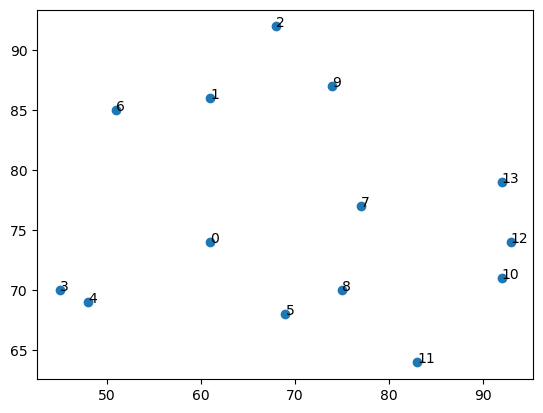

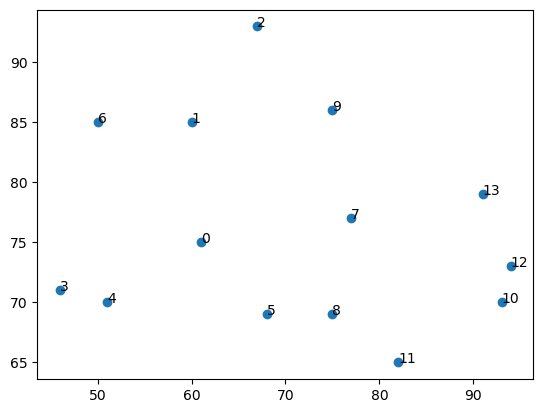

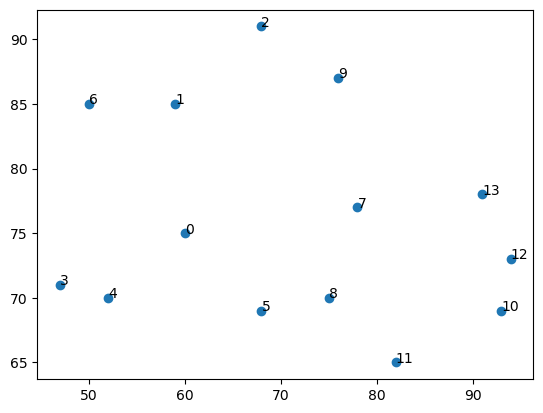

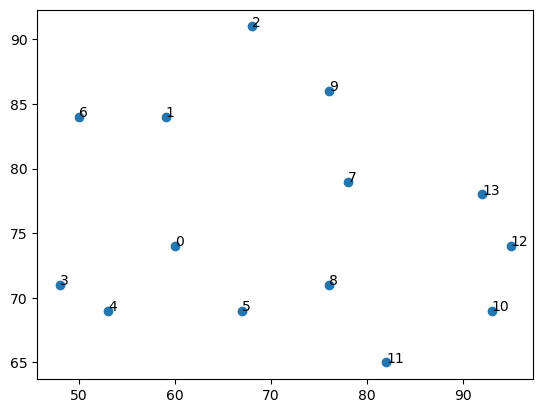

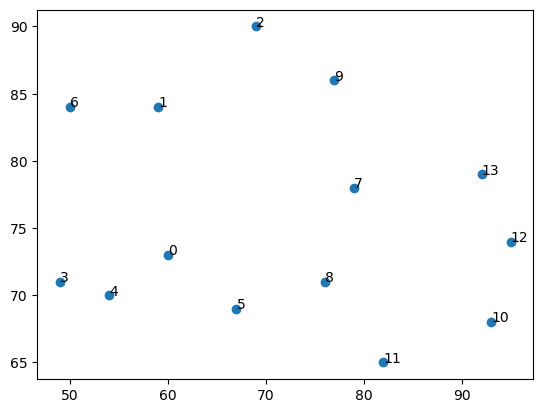

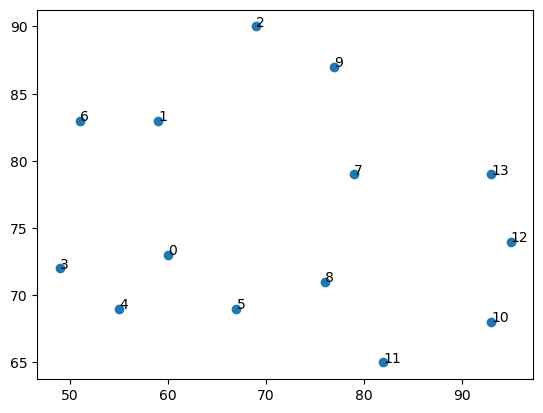

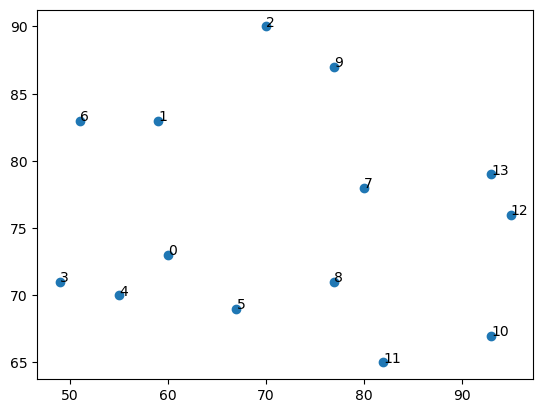

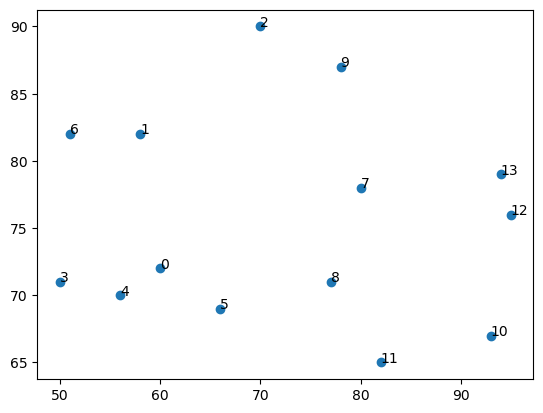

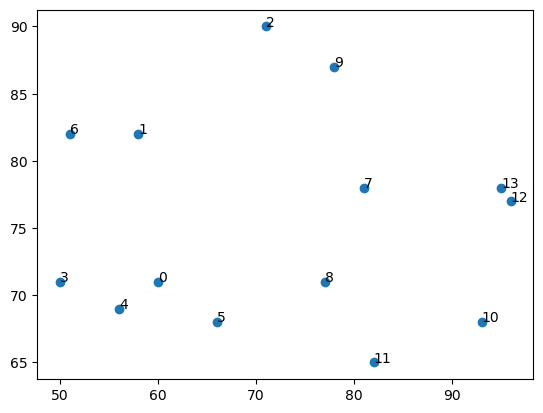

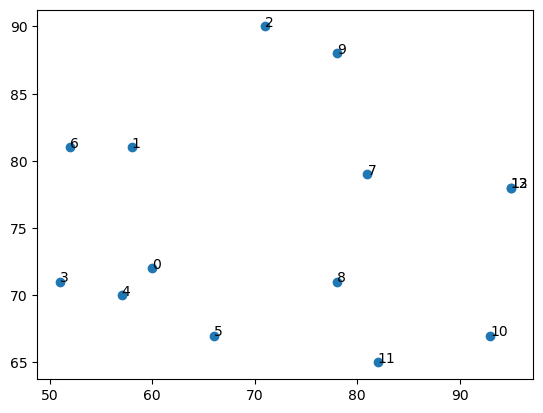

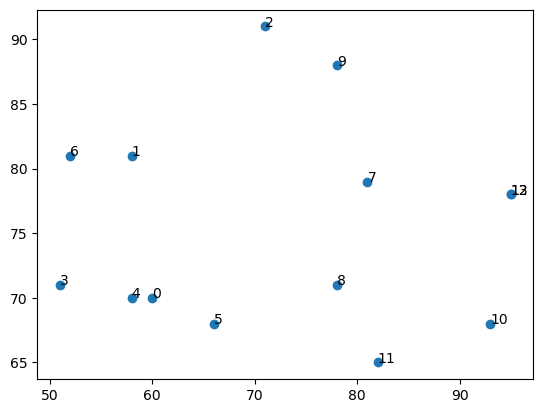

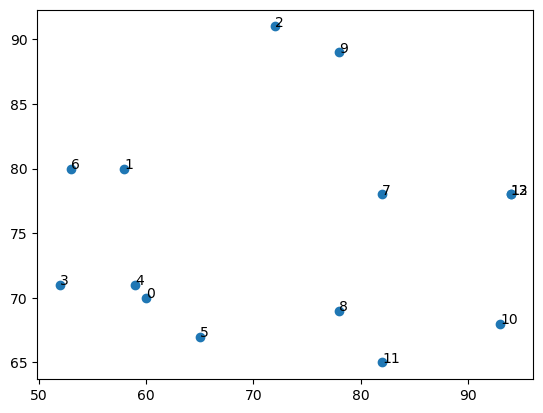

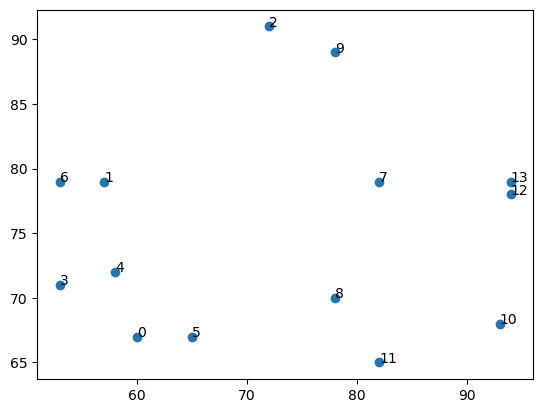

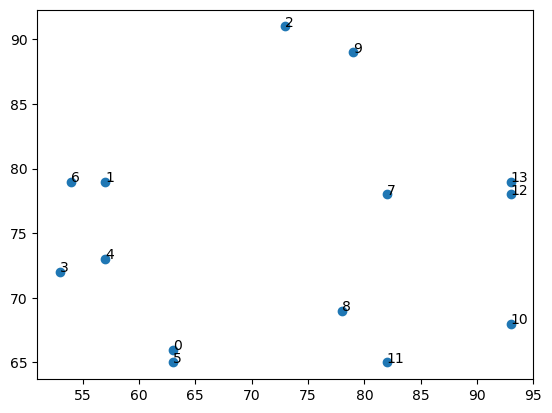

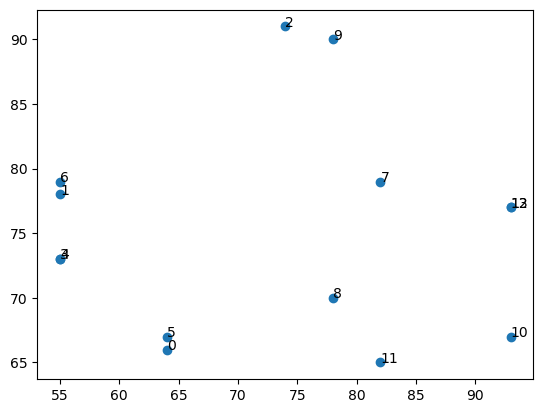

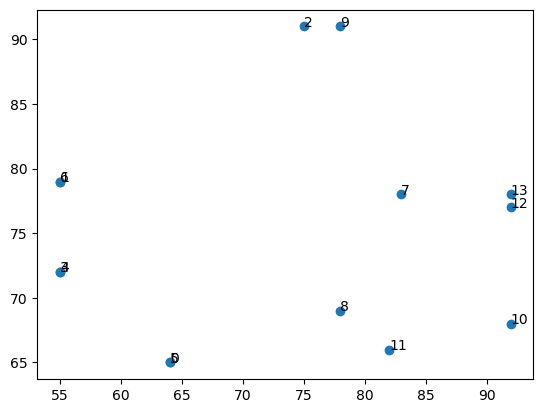

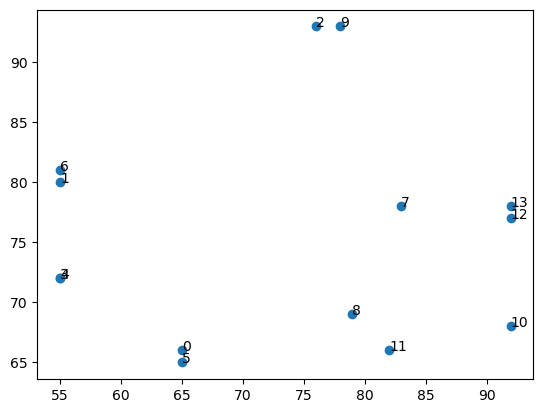

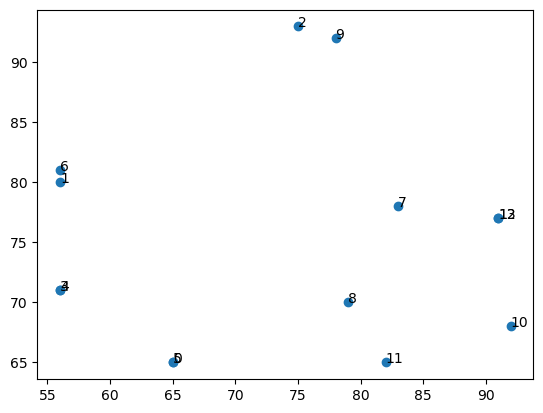

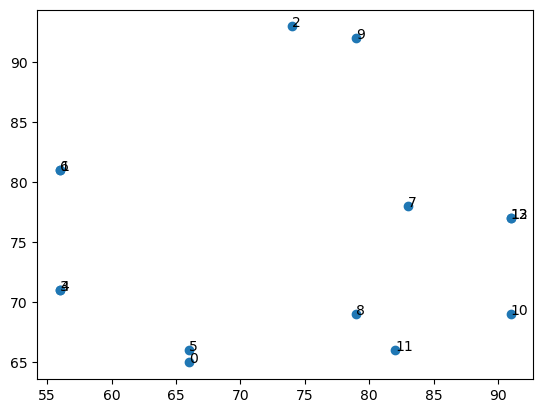

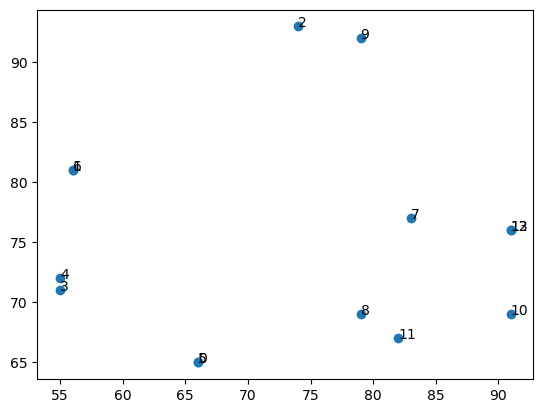

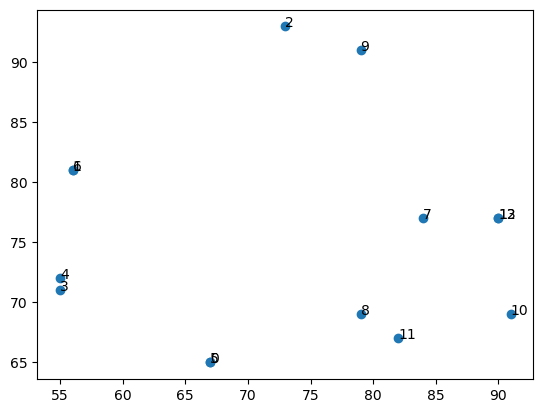

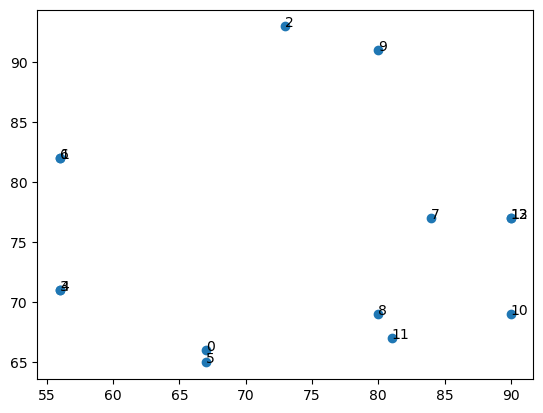

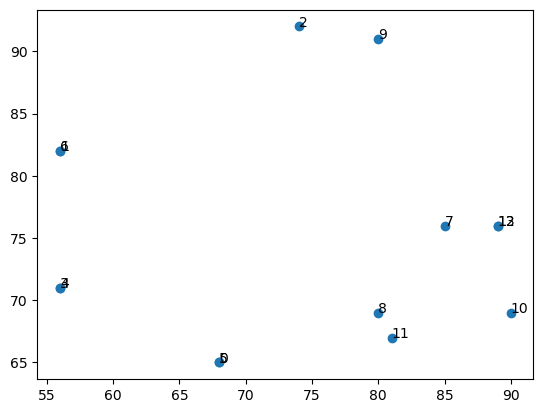

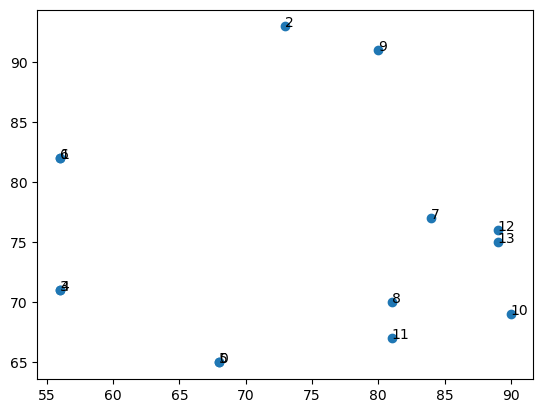

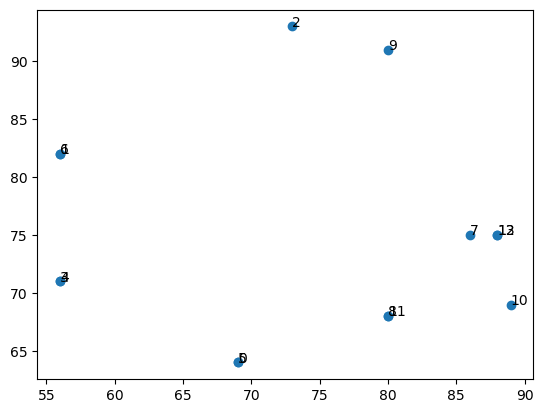

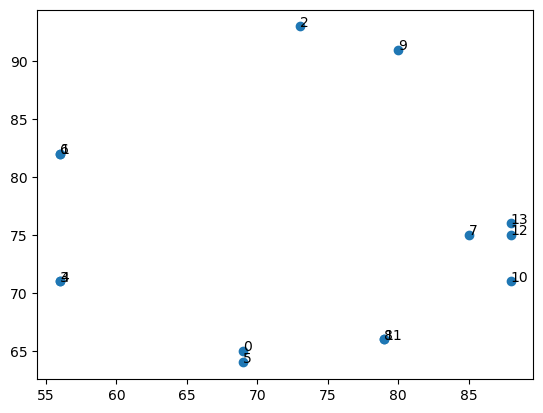

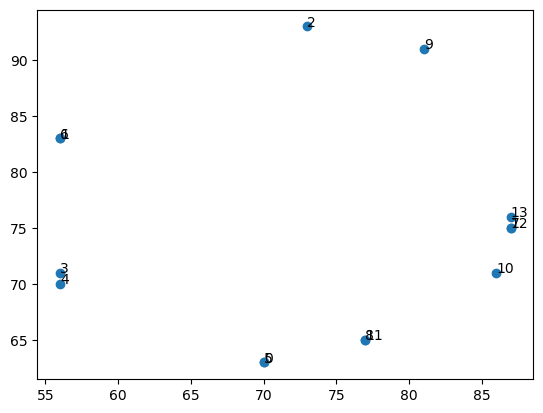

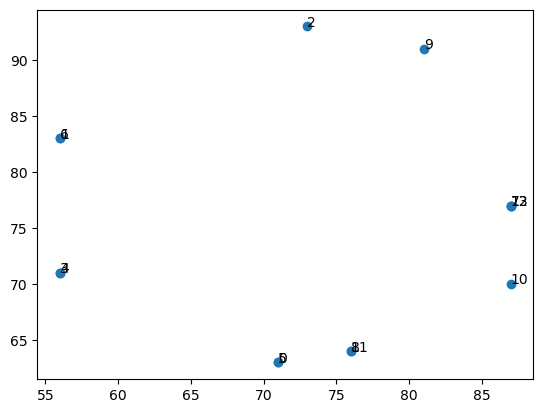

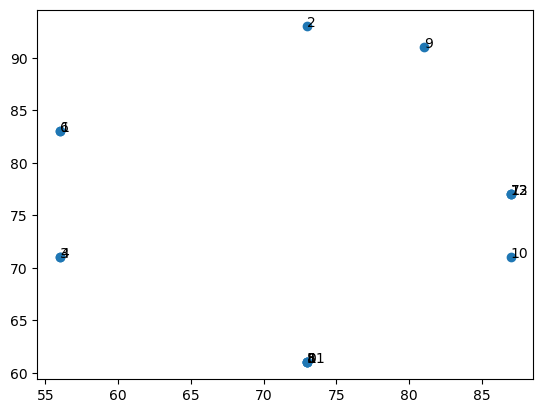

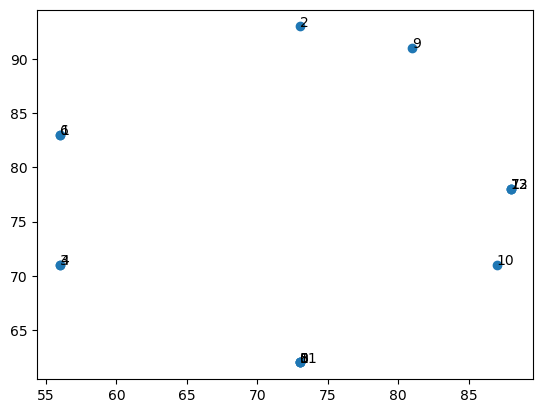

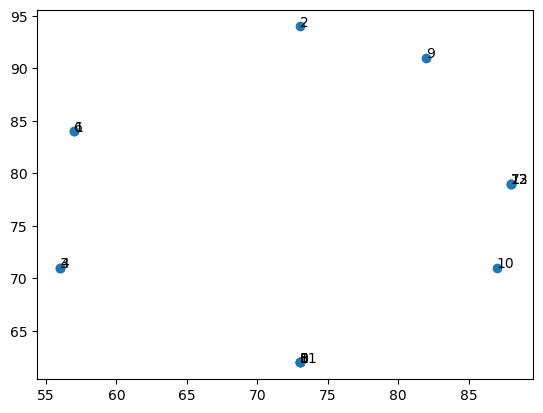

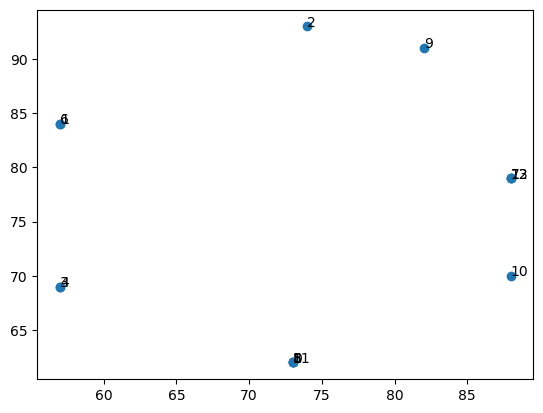

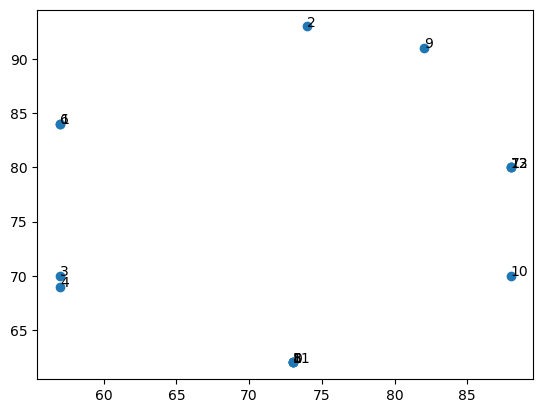

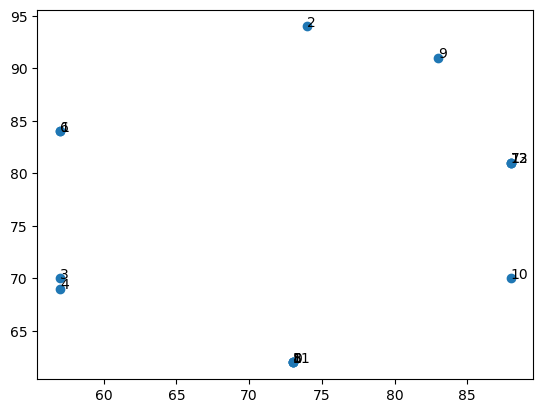

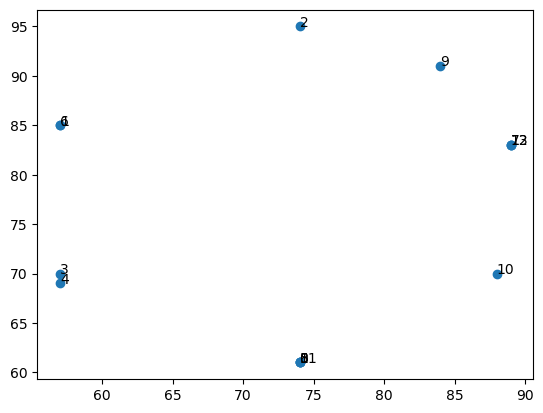

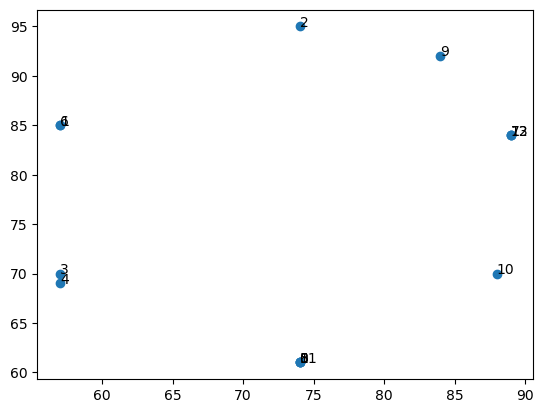

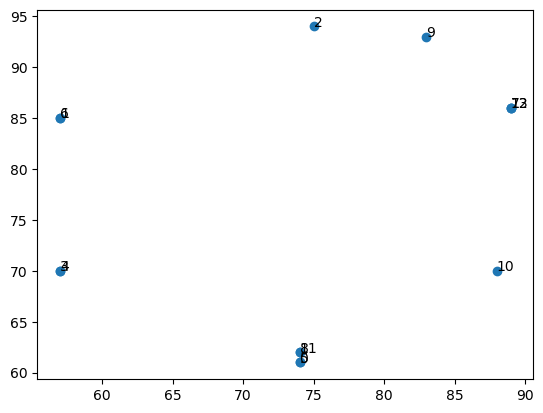

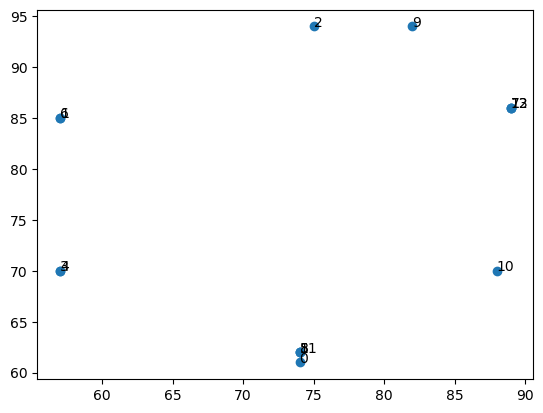

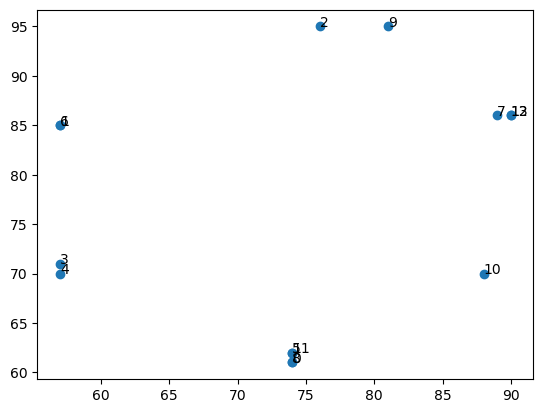

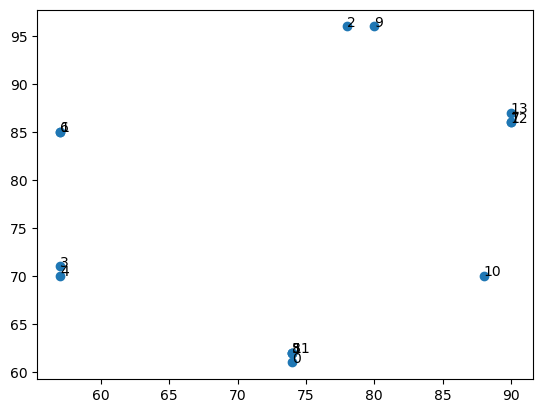

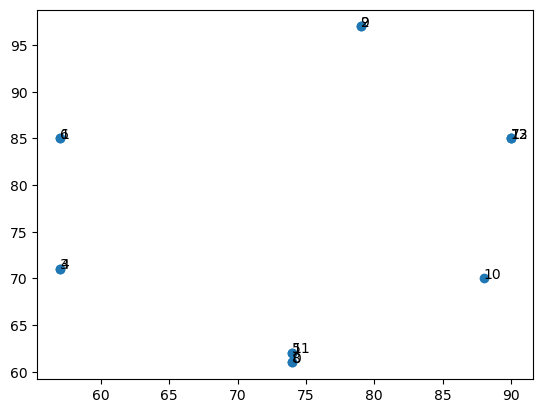

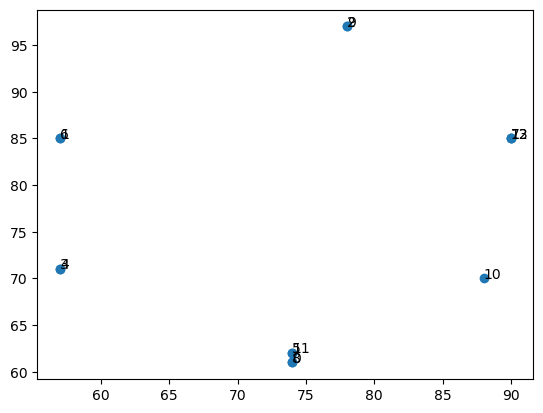

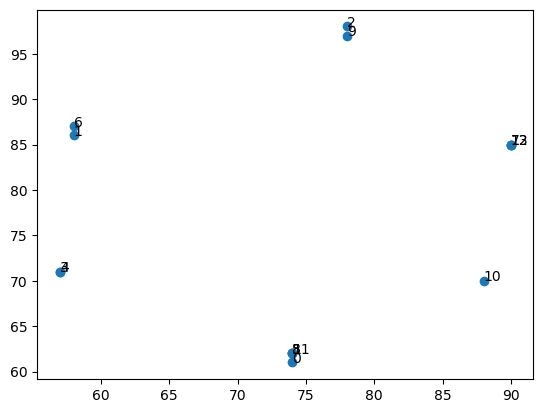

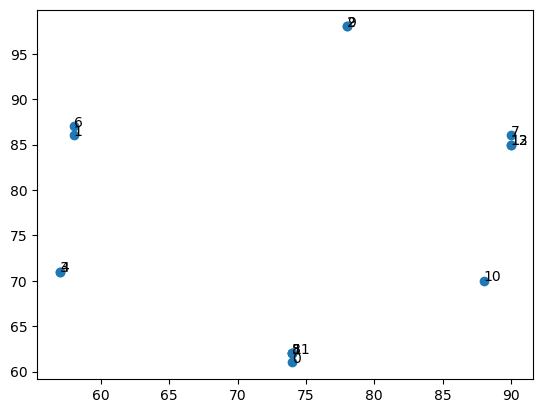

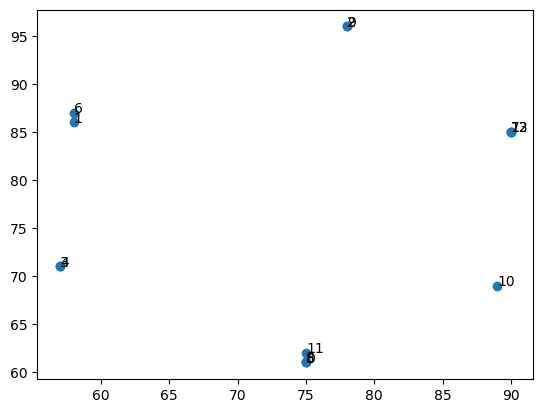

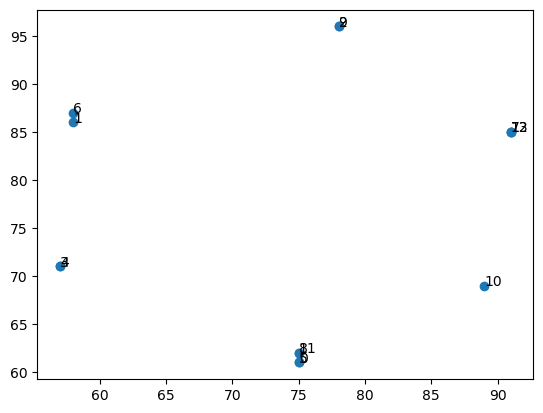

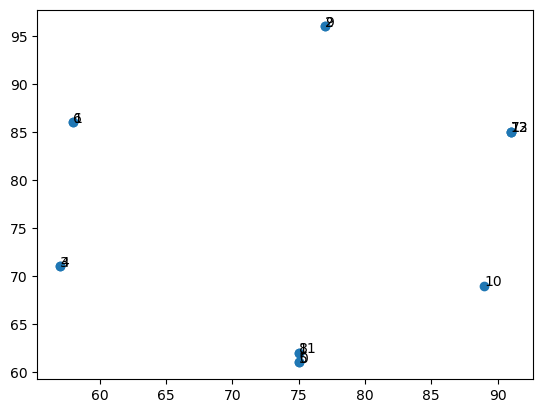

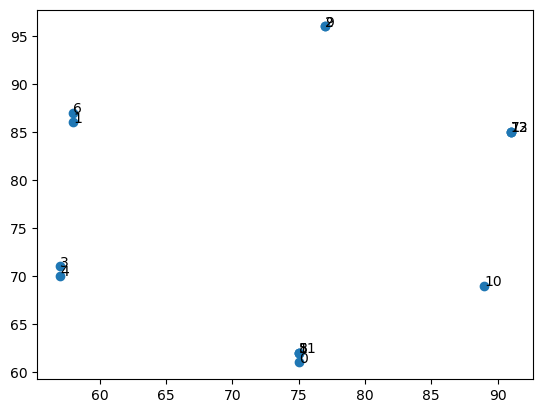

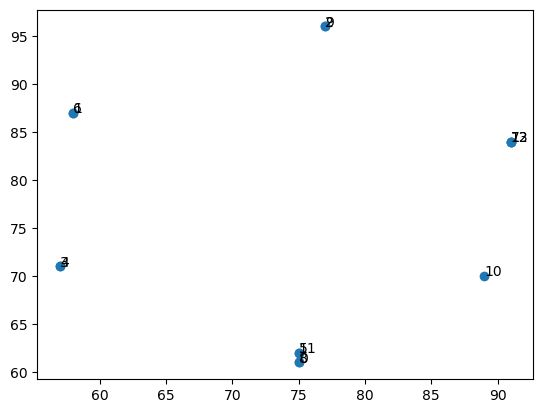

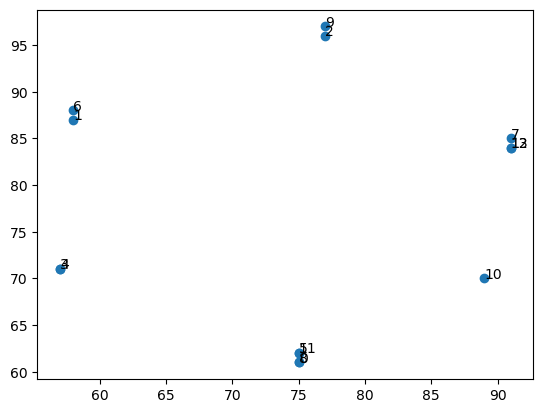

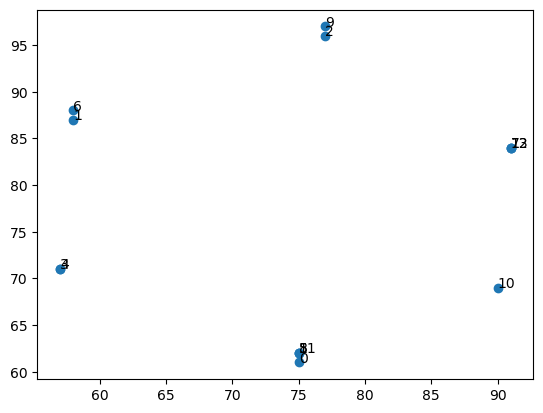

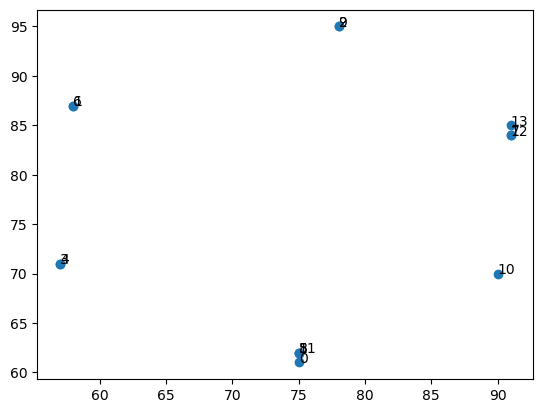

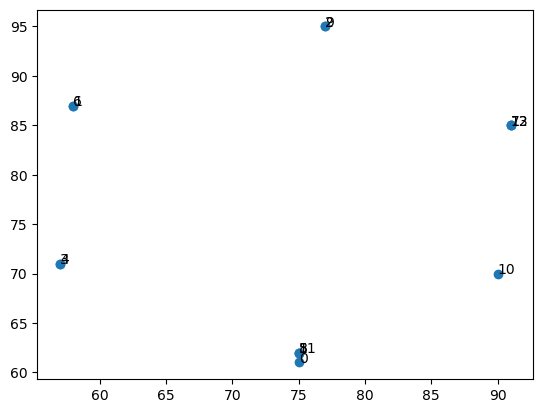

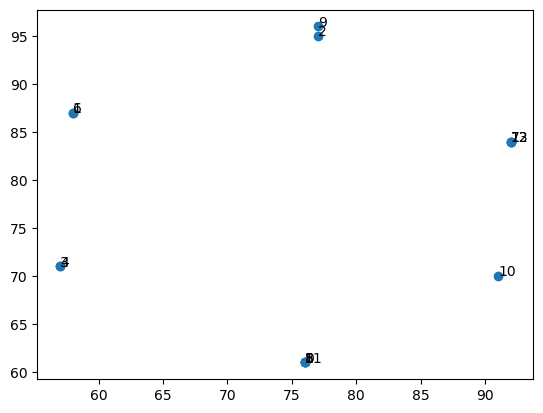

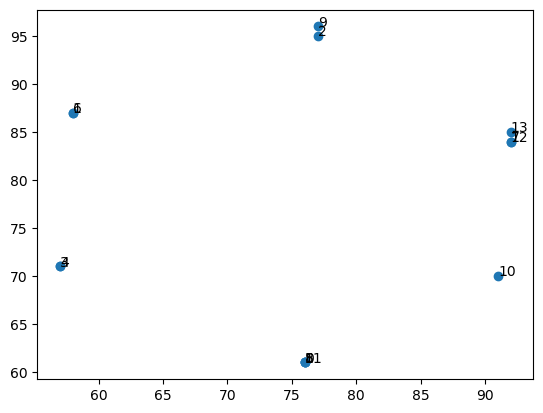

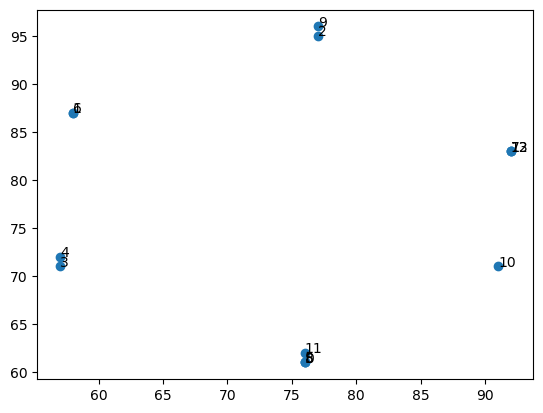

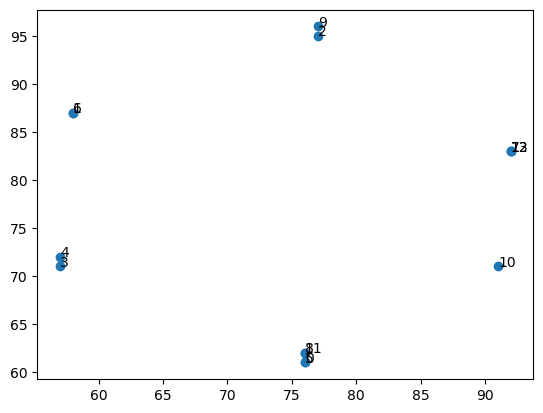

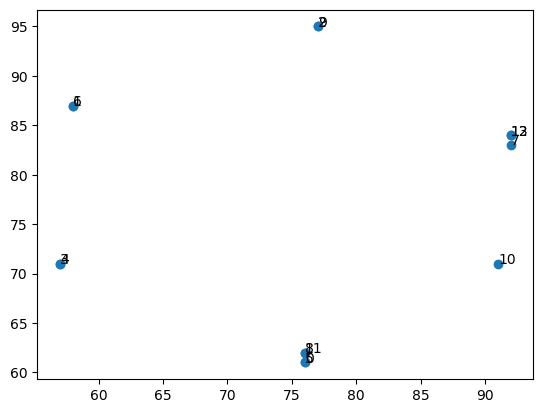

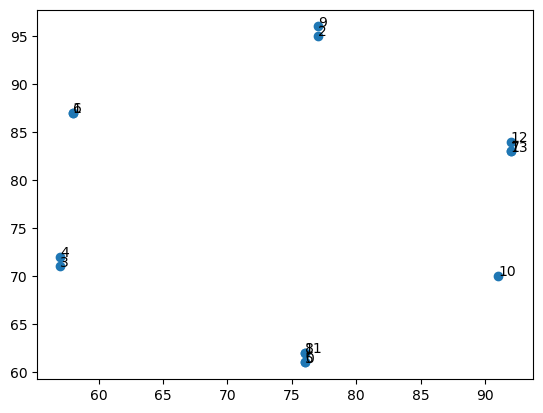

In [14]:
for j in range(59):
    plt.scatter(t_val[j][:,1], t_val[j][:,2])
    for i in range(len(t_val[j])):
        plt.annotate(i,[t_val[j][i,1],t_val[j][i,2]])
    plt.savefig(f'track_plots/plot_{j}.png')
    plt.show()

In [17]:
with imageio.get_writer('track_plots/tr_plots.gif', mode='I') as writer:
    for i in range(59):
        filename = f'track_plots/plot_{i}.png'
        image = imageio.imread(filename)
        writer.append_data(image)

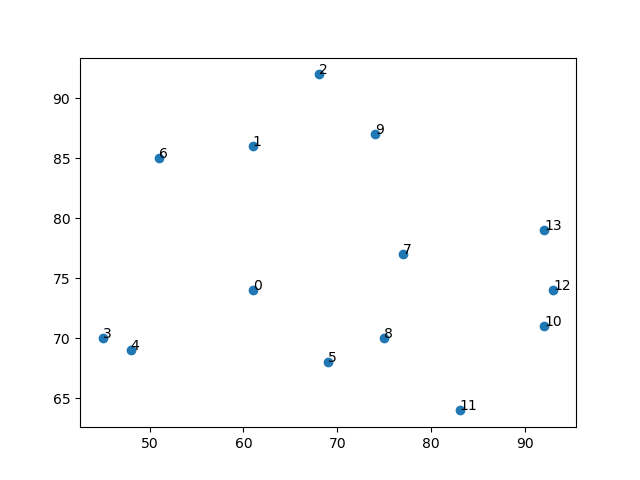

In [21]:
Image(filename='track_plots/tr_plots.gif')

In [7]:
adj_mat = [[0,1,0,0,1,1,0,0,0,0,0,0,0,0],
           [1,0,1,0,0,0,1,0,0,0,0,0,0,0],
           [0,1,0,0,0,0,0,0,0,1,0,0,0,0],
           [0,0,0,0,1,0,1,0,0,0,0,0,0,0],
           [1,0,0,1,0,0,0,0,0,0,0,0,0,0],
           [1,0,0,0,0,0,0,0,1,0,0,0,0,0],
           [0,1,0,1,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,1,1,0,0,0,1],
           [0,0,0,0,0,1,0,1,0,0,0,1,0,0],
           [0,0,1,0,0,0,0,1,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,0,1,1,0],
           [0,0,0,0,0,0,0,0,1,0,1,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,1,0,0,1],
           [0,0,0,0,0,0,0,1,0,0,0,0,1,0]]

In [20]:
adj_dict = {}
for i in range(59):
    adj_dict[i] = adj_mat.copy()

NameError: name 'adj_mat' is not defined